Part 2 1st Question

Text(0, 0.5, 'Joint Position')

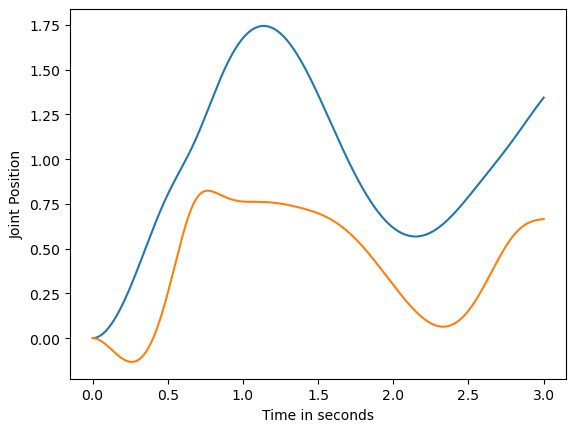

In [2]:
import os
import mujoco 
import numpy 
import mediapy as media
import matplotlib.pyplot as plt
import math
xml = '''
<mujoco>
    <option timestep = "0.001" />
    <worldbody>
    <light pos="0 0 1"/>
        <body name="A" pos="0 0 0" axisangle="0 1 0 0">
        <joint name="j1" axis="0 1 0" pos="0 0 0" stiffness= "10" damping= "1" />
        <geom type="box" size=".5 .05 .05" rgba="1 0 0 1" pos=".5 0 0 " mass="1"/>
            <body name="B" pos="1 0 0" axisangle="0 1 0 -80">     
                <joint name="j2" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="10" damping="1" />
                <geom type="box" size=".5 .05 .05" rgba="1 1 0 1" pos=".5 0 0"  mass="1"/>
                </body>
        </body>
    </worldbody>
</mujoco>
'''

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
mujoco.mj_resetData(model,data)   
renderer = mujoco.Renderer(model)
duration = 3
framerate = 30
frames = []
x = []
q = []
w = []
t = []
last_time  = data.time
while data.time<duration:
    mujoco.mj_step(model,data)##stepping my 1 timestep
    t.append(data.time)
    q.append(data.qpos.copy())
    w.append(data.qvel.copy())
plt.plot(t,q)
plt.xlabel("Time in seconds")
plt.ylabel("Joint Position")


Blue colour: Graph of 1st joint and  Orange : Graph of 2nd joint

Part 2 : 2nd Question

Text(0, 0.5, 'Joint Position')

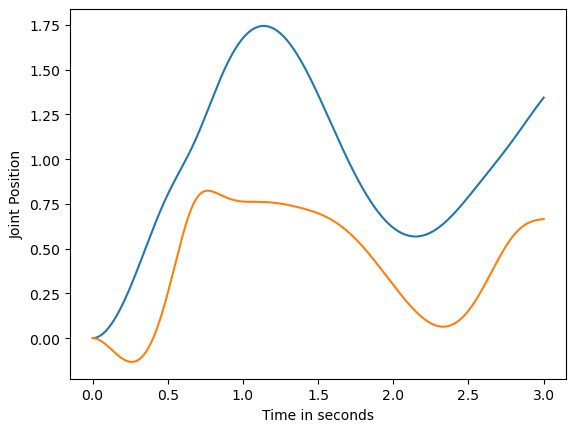

In [5]:
import os
import mujoco 
import numpy 
import mediapy as media
import matplotlib.pyplot as plt
import math
xml = '''
<mujoco>
    <option timestep = "0.001" />
    <worldbody>
    <light pos="0 0 1"/>
        <body name="A" pos="0 0 0" axisangle="0 1 0 0">
        <joint name="j1" axis="0 1 0" pos="0 0 0" stiffness= "{k}" damping= "{b}" />
        <geom type="box" size=".5 .05 .05" rgba="1 0 0 1" pos=".5 0 0 " mass="1"/>
            <body name="B" pos="1 0 0" axisangle="0 1 0 -80">     
                <joint name="j2" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="{k}" damping="{b}" />
                <geom type="box" size=".5 .05 .05" rgba="1 1 0 1" pos=".5 0 0"  mass="1"/>
                </body>
        </body>
    </worldbody>
</mujoco>
'''
xml_tem=xml.format(k=10,b=1)
model = mujoco.MjModel.from_xml_string(xml_tem)
data = mujoco.MjData(model)
mujoco.mj_resetData(model,data)   
renderer = mujoco.Renderer(model)
duration = 3
framerate = 30
frames = []
x = []
q = []
w = []
t = []
last_time  = data.time
while data.time<duration:
    mujoco.mj_step(model,data)##stepping my 1 timestep
    t.append(data.time)
    q.append(data.qpos.copy())
    w.append(data.qvel.copy())
plt.plot(t,q)
plt.xlabel("Time in seconds")
plt.ylabel("Joint Position")

Blue colour: Graph of 1st joint and  Orange : Graph of 2nd joint  
Yes the values are same

Part 3

In [8]:
import os
import mujoco 
import numpy 
import mediapy as media
import matplotlib.pyplot as plt
import math
import yaml

with open('output.ylm.txt') as f:
    data = yaml.load(f,Loader=yaml.Loader)
    q_git = numpy.array(data['q'])
    w_git = numpy.array(data['w'])

q_ini=q_git[0] #Initializatoin of position
w_ini=w_git[0] #initialization of velocity



(3002, 2)

Part 4

In [10]:
import os
import mujoco
import numpy
import mediapy as media
import matplotlib.pyplot as plt
def Pendulum(e, f):
    xml_tem = """
    <mujoco>
    <option timestep = "0.001" />
    <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="A" pos="0 0 0">
    <joint name="j1" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="{k}" damping="{b}" />
    <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1" mass="1"/>
    <body name="B" pos="1 0 0">
    <joint name="j2" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="{k}" damping="{b}"/>
    <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1" mass="1"/>
    </body>
    </body>
    </worldbody>
    </mujoco>
    """
    xml = xml_tem.format(k=e, b=f)
    
    model = mujoco.MjModel.from_xml_string(xml)
    data = mujoco.MjData(model)
    t=[]
    q=[]
    w=[]
    x=[]
    duration = 3 
    t.append(data.time)
    q.append(data.qpos.copy())
    w.append(data.qvel.copy())
    x.append(data.xpos.copy())

    
    while data.time < duration:
        mujoco.mj_step(model, data)
        t.append(data.time)
        q.append(data.qpos.copy())
        w.append(data.qvel.copy())
        x.append(data.xpos.copy())
    return(t,q)



f=Pendulum(10, 1)

timee=numpy.array(f[0])
poss=numpy.array(f[1])




(3002,)

Part 5

In [12]:
q_diff=numpy.subtract(q_git,poss)
mse = numpy.mean(numpy.square(q_diff)) 
print("Mean square error is",mse)

Mean square error is 0.4073322431554746


Part 6 and Part 7

Total error is 11.343340758462


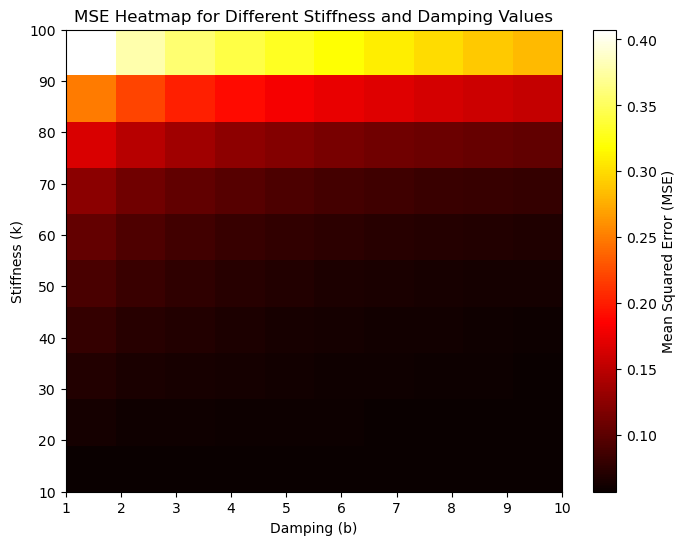

In [14]:
import os
import mujoco
import numpy
import mediapy as media
import matplotlib.pyplot as plt
import yaml

with open('output.ylm.txt') as f:
    data = yaml.load(f,Loader=yaml.Loader)
    q_git = numpy.array(data['q'])
    w_git = numpy.array(data['w'])

q_ini=q_git[0] #Initializatoin of position
w_ini=w_git[0] #initialization of velocity



def Pendulum(e, f):
    xml_tem = """
    <mujoco>
    <option timestep = "0.001" />
    <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="A" pos="0 0 0">
    <joint name="j1" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="{k}" damping="{b}" />
    <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1" mass="1"/>
    <body name="B" pos="1 0 0">
    <joint name="j2" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="{k}" damping="{b}"/>
    <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1" mass="1"/>
    </body>
    </body>
    </worldbody>
    </mujoco>
    """
    xml = xml_tem.format(k=e, b=f)
    
    model = mujoco.MjModel.from_xml_string(xml)
    data = mujoco.MjData(model)
    t=[]
    q=[]
    w=[]
    x=[]
    duration = 3 
    t.append(data.time)
    q.append(data.qpos.copy())
    w.append(data.qvel.copy())
    x.append(data.xpos.copy())

    
    while data.time < duration:
        mujoco.mj_step(model, data)
        t.append(data.time)
        q.append(data.qpos.copy())
        w.append(data.qvel.copy())
        x.append(data.xpos.copy())
    return(t,q)
k_range=numpy.arange(10,101,10)
b_range=numpy.arange(1,11,1)
mse_tot=[]
for c in k_range:
    for d in b_range:
        t=Pendulum(c,d)
        t_pos=numpy.array(t[1])
        dif=numpy.subtract(q_git,t_pos)
        ms = numpy.mean(numpy.square(dif)) 
        mse_tot.append(ms)
mse_tot = numpy.array(mse_tot)

total_mse=numpy.sum(mse_tot)

print("Total error is",total_mse)

mse_tot = mse_tot.reshape(len(k_range), len(b_range))

plt.figure(figsize=(8, 6))
plt.imshow(mse_tot, cmap='hot', interpolation='nearest', extent=[b_range.min(), b_range.max(), k_range.min(), k_range.max()], aspect='auto')
plt.colorbar(label='Mean Squared Error (MSE)')
plt.xlabel('Damping (b)')
plt.ylabel('Stiffness (k)')
plt.title('MSE Heatmap for Different Stiffness and Damping Values')
plt.show()

From the graph we can see that the maximum  Mean square error is at b=1 and k=100 and minimum at k=10

Part 7  

We manually mentioned the inital position and velocity of the double penndulum. That can be automated by dumping the inital value in the yml format and then running the code.